ORIE 6750 Homework 1 Question 3

For future use: different color schemes in matplotlib https://matplotlib.org/api/pyplot_summary.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

$V(s,h)=\min\{V(s+1,h-1),\frac{1}{2}V(\min\{9,s+2\},h-1)+\frac{1}{2}V(\max\{0,s-1\},h-1)\}$

In [26]:
values = np.zeros([10,9])
policies = np.zeros([10,9])
qdiff = np.zeros([10,9])

In [44]:
# initialize values matrix and back-propagate
values[9]=np.ones(9)
for h in range(1,9):
    for s in range(9):
        q1 = values[s+1][h-1] # conservative
        q2 = 0.5*values[min(9,s+2)][h-1] + 0.5*values[max(0,s-1)][h-1] # risky
        if q1>q2:
            policies[s][h]=0
            values[s][h]=q1
            qdiff[s][h]=q2-q1
        elif q1<=q2:
            policies[s][h]=1
            values[s][h]=q2
            qdiff[s][h]=q2-q1
        
        

In [45]:
values_df=pd.DataFrame(values)
policies_df=pd.DataFrame(policies)
qdiff_df=pd.DataFrame(qdiff)

In [46]:
values_df

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.00,0.000,0.0000,0.0625,0.1875,0.37500,0.6875
1,0.0,0.0,0.00,0.000,0.0625,0.1250,0.3125,0.59375,1.0000
2,0.0,0.0,0.00,0.000,0.1250,0.3125,0.5625,1.00000,1.0000
3,0.0,0.0,0.00,0.125,0.2500,0.5625,1.0000,1.00000,1.0000
4,0.0,0.0,0.00,0.250,0.5625,1.0000,1.0000,1.00000,1.0000
5,0.0,0.0,0.25,0.500,1.0000,1.0000,1.0000,1.00000,1.0000
6,0.0,0.0,0.50,1.000,1.0000,1.0000,1.0000,1.00000,1.0000
7,0.0,0.5,1.00,1.000,1.0000,1.0000,1.0000,1.00000,1.0000
8,0.0,1.0,1.00,1.000,1.0000,1.0000,1.0000,1.00000,1.0000
9,1.0,1.0,1.00,1.000,1.0000,1.0000,1.0000,1.00000,1.0000


In [47]:
policies_df.astype(int)

,0,1,2,3,4,5,6,7,8
0,0,1,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1,0
2,0,1,1,1,1,1,1,0,0
3,0,1,1,1,1,1,0,0,1
4,0,1,1,1,1,0,0,1,1
5,0,1,1,1,0,0,1,1,1
6,0,1,1,0,0,1,1,1,1
7,0,1,0,0,1,1,1,1,1
8,0,0,0,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0


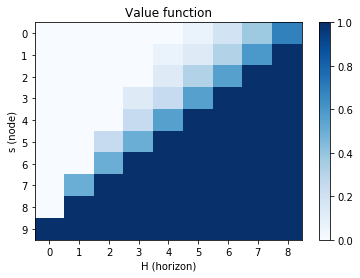

In [48]:
fig, ax = plt.subplots()
value_heat=ax.pcolor(values_df, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(values_df.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(values_df.shape[0]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(list('012345678'), minor=False)
ax.set_yticklabels(list('0123456789'), minor=False)
plt.xlabel('H (horizon)')
plt.ylabel('s (node)')
plt.title('Value function')
fig.colorbar(value_heat, ax=ax)
plt.show()



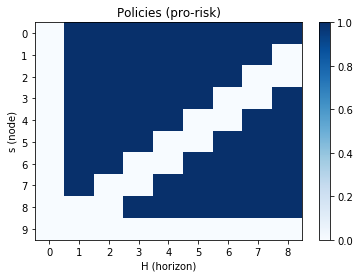

In [50]:
fig, ax = plt.subplots()
policy_heat=ax.pcolor(policies_df, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(policies_df.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(policies_df.shape[0]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(list('012345678'), minor=False)
ax.set_yticklabels(list('0123456789'), minor=False)
plt.xlabel('H (horizon)')
plt.ylabel('s (node)')
plt.title('Policies (pro-risk)')
fig.colorbar(policy_heat, ax=ax)
plt.show()

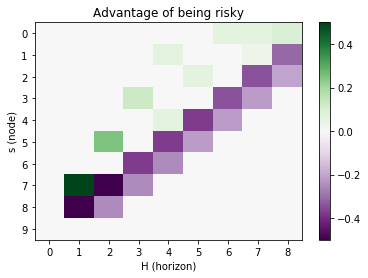

In [42]:
fig, ax = plt.subplots()
qdiff_heat=ax.pcolor(qdiff_df, cmap=plt.cm.PRGn)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(qdiff_df.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(qdiff_df.shape[0]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(list('012345678'), minor=False)
ax.set_yticklabels(list('0123456789'), minor=False)
plt.xlabel('H (horizon)')
plt.ylabel('s (node)')
plt.title('Advantage of being risky')
fig.colorbar(qdiff_heat, ax=ax)
plt.show()

In [34]:
qdiff_df

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.00,0.000,0.0000,0.00000,0.06250,0.06250,0.093750
1,0.0,0.0,0.00,0.000,0.0625,0.00000,0.00000,0.03125,-0.312500
2,0.0,0.0,0.00,0.000,0.0000,0.06250,0.00000,-0.34375,-0.203125
3,0.0,0.0,0.00,0.125,0.0000,0.00000,-0.34375,-0.21875,0.000000
4,0.0,0.0,0.00,0.000,0.0625,-0.37500,-0.21875,0.00000,0.000000
5,0.0,0.0,0.25,0.000,-0.3750,-0.21875,0.00000,0.00000,0.000000
6,0.0,0.0,0.00,-0.375,-0.2500,0.00000,0.00000,0.00000,0.000000
7,0.0,0.5,-0.50,-0.250,0.0000,0.00000,0.00000,0.00000,0.000000
8,0.0,-0.5,-0.25,0.000,0.0000,0.00000,0.00000,0.00000,0.000000
9,0.0,0.0,0.00,0.000,0.0000,0.00000,0.00000,0.00000,0.000000
